In [2]:
#Import needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

In [92]:
#Ignore warnings in output of the cell
import warnings
warnings.filterwarnings('ignore')

In [94]:
# load the csv data to a pandas dataframe
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [96]:
df.shape

(7043, 21)

In [98]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [205]:
df['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [100]:
#Make it so that we see all columns
pd.set_option("display.max_columns", None)

In [102]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [104]:
#Check the datatype of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [106]:
# dropping customerID column as this is not required for modelling
df = df.drop(columns=["customerID"])

In [108]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [110]:
# printing the unique values in all catagorical columns

numerical_features_list = ["tenure", "MonthlyCharges", "TotalCharges"]

for col in df.columns:
  if col not in numerical_features_list:
    print(col, df[col].unique())
    print("-"*50)

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV ['No' 'Yes' 'No internet 

In [112]:
#Check for any missing values in the dataset
print(df.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [114]:
#df["TotalCharges"] = df["TotalCharges"].astype(float)

In [116]:
#Replacing the blank data in the total charges with 0
df[df["TotalCharges"]==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [118]:
len(df[df["TotalCharges"]==" "])

11

In [120]:
df["TotalCharges"] = df["TotalCharges"].replace({" ": "0.0"})

In [122]:
#Converting the type of totalcharges from object to float
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [126]:
# checking the class distribution of target column
print(df["Churn"].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


Insights:

Customer ID removed as it is not required for modelling
No mmissing values in the dataset
Missing values in the TotalCharges column were replaced with 0
Class imbalance identified in the target

In [129]:
#Handling imbalance through undersampling
churns = df[df.Churn == 'Yes']
not_churns = df[df.Churn == 'No']

In [131]:
print(churns.shape)
print(not_churns.shape)

(1869, 20)
(5174, 20)


In [133]:
not_churns_sample = not_churns.sample(n=1900)

In [135]:
print(not_churns_sample.shape)

(1900, 20)


In [137]:
df_b = pd.concat([churns, not_churns_sample], axis = 0)

In [139]:
df_b.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2523,Female,0,Yes,Yes,47,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.25,873.40,No
59,Female,0,No,No,72,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),107.50,7853.70,No
6851,Male,0,Yes,Yes,38,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),94.90,3616.25,No
2810,Female,1,Yes,Yes,65,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),103.90,6767.10,No
1777,Female,0,No,No,28,Yes,Yes,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),54.90,1505.15,No


In [141]:
#Take a look at the descriptive statistics of the numerical columns
df_b.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,3769.000000,3769.000000,3769.000000,3769.000000
mean,0.191297,27.553728,67.983497,2030.644707
std,0.393375,23.747250,28.617276,2166.385299
min,0.000000,0.000000,18.550000,0.000000
25%,0.000000,5.000000,45.650000,270.800000
50%,0.000000,22.000000,74.600000,1164.050000
75%,0.000000,48.000000,90.650000,3217.550000
max,1.000000,72.000000,118.650000,8684.800000


In [143]:
numerical_cols = df_b.select_dtypes(include="number").columns.to_list()

In [145]:
numerical_cols.remove('SeniorCitizen')

In [147]:
numerical_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

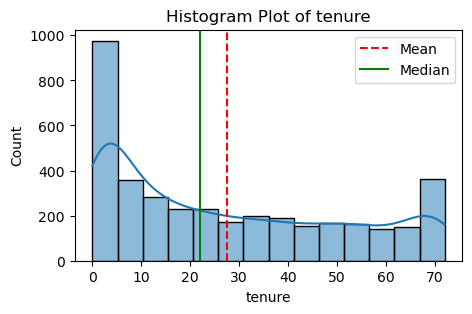

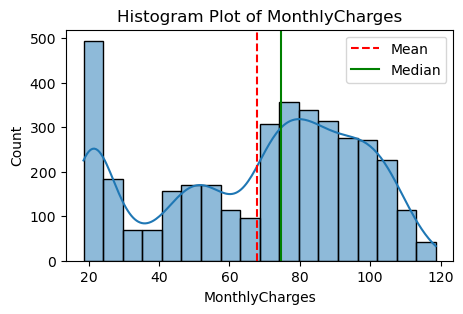

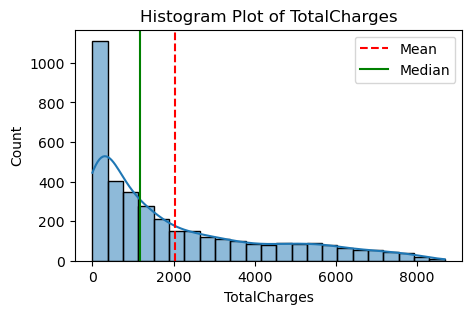

In [149]:
#Histogram plot for the numerical columns in the dataset
#To see the distribution

for col in numerical_cols:
  plt.figure(figsize=(5, 3))
  sns.histplot(df_b[col], kde = True)
  col_mean = df_b[col].mean()
  col_median = df_b[col].median()

  # add vertical lines for mean and median
  plt.axvline(col_mean, color="red", linestyle="--", label="Mean")
  plt.axvline(col_median, color="green", linestyle="-", label="Median")

  plt.legend()
  plt.title(f"Histogram Plot of {col}")
  plt.show()

#Takeaway: Seems like the distribution is not uniform or normal

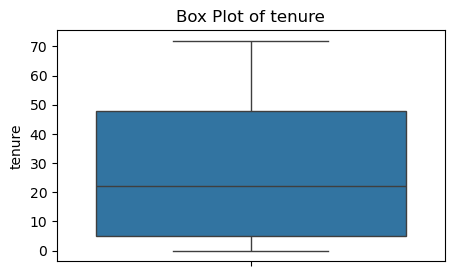

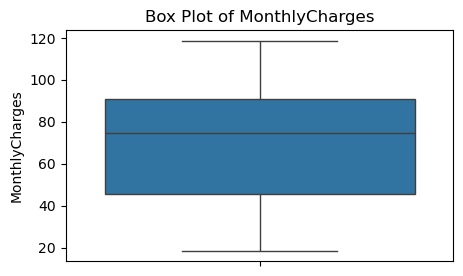

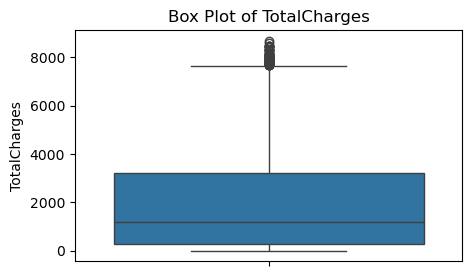

In [151]:
#Box plot to show outliers and to detect them and treat outliers
#using this method
for col in numerical_cols:
  plt.figure(figsize=(5, 3))
  sns.boxplot(y=df_b[col])
  plt.title(f"Box Plot of {col}")
  plt.ylabel(col)
  plt.show
#We see that there are no outliers in the numerical columns

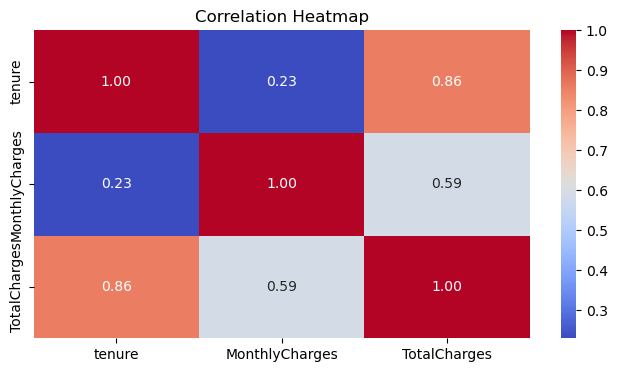

In [153]:
# correlation matrix - heatmap
plt.figure(figsize=(8, 4))
corr = df_b[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
# We see a close relationship between totalcharges and tenure(positive correlation)
# As well as monthly charges and total charges which makes sense logically

In [155]:
df_b.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes


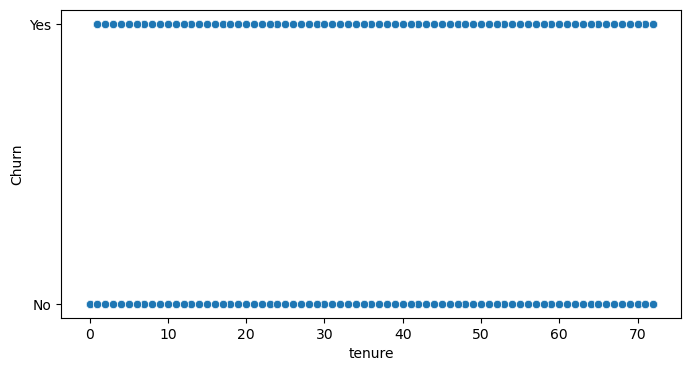

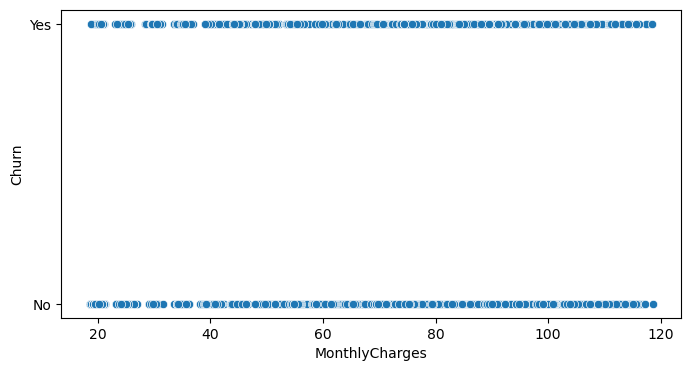

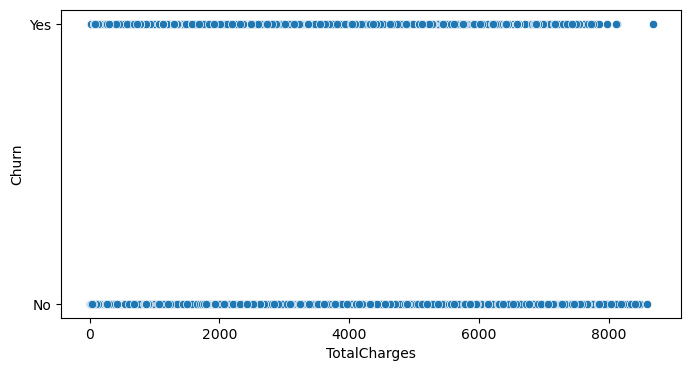

In [157]:
#Drawing a scatter plot between numerical columns(features) to the target
#To see any relationship trens, seems like not that much information is gained
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(data = df_b, x = df_b[col], y = df_b['Churn'])
    plt.show

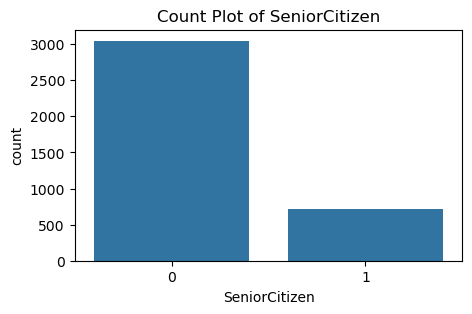

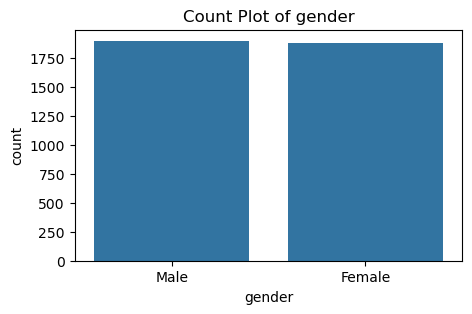

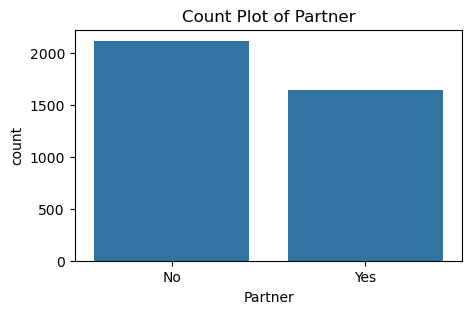

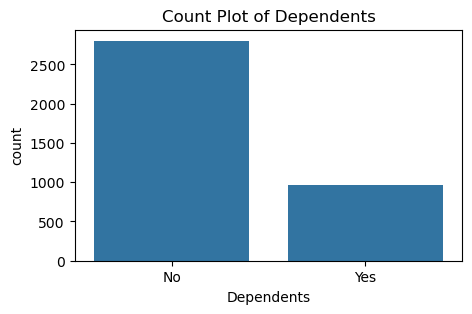

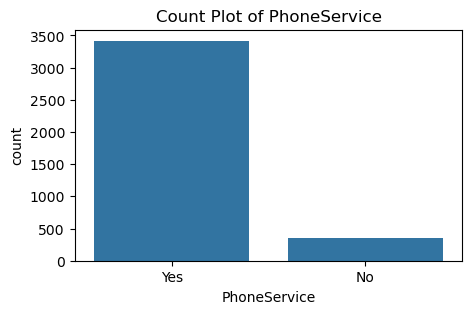

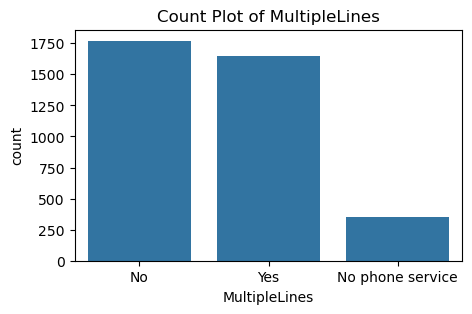

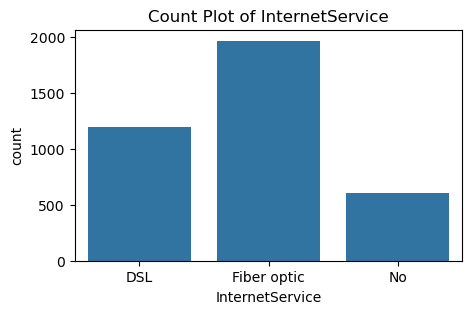

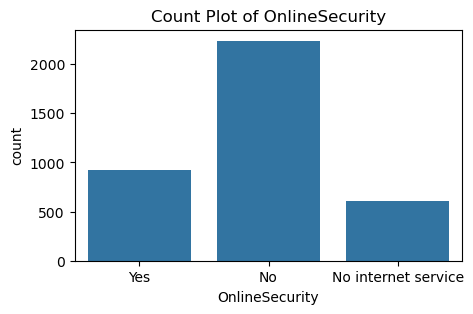

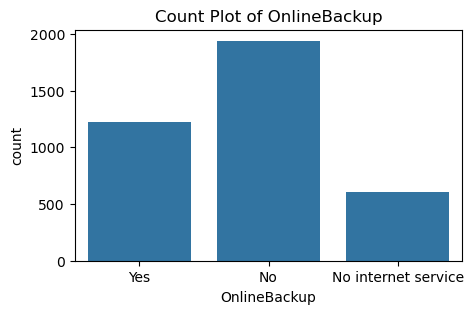

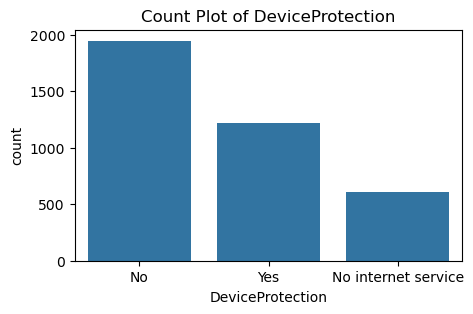

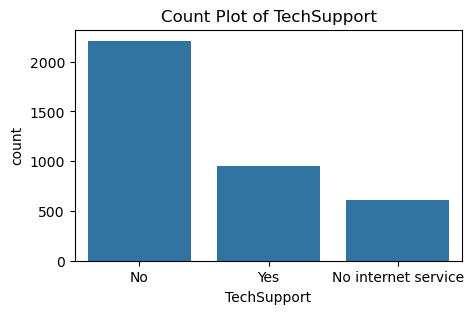

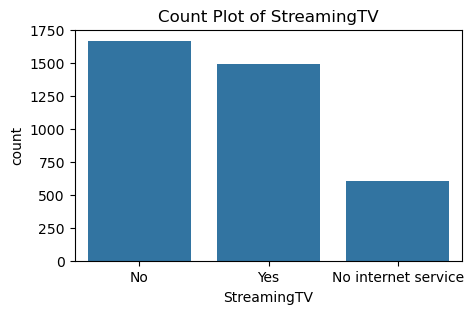

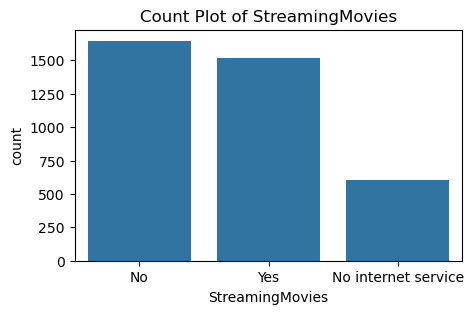

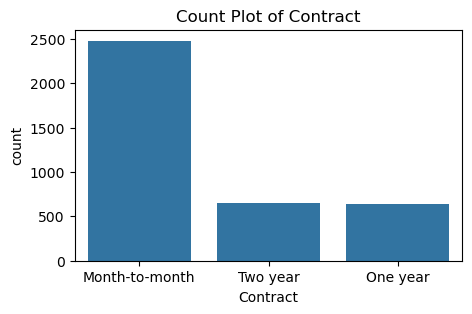

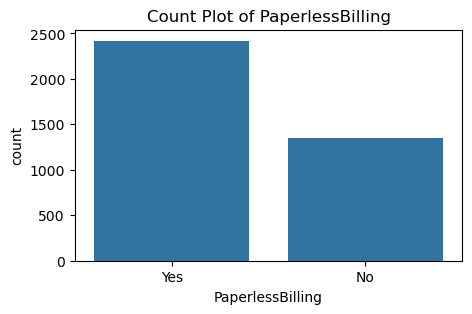

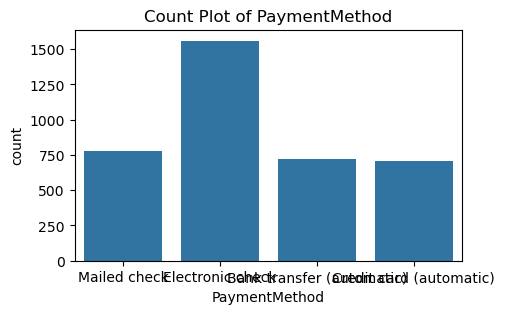

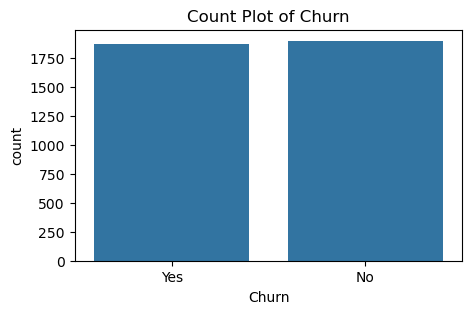

In [159]:
#Drawing a count plot for each catagorical columns to see the counts
object_cols = df_b.select_dtypes(include="object").columns.to_list()

object_cols = ["SeniorCitizen"] + object_cols

for col in object_cols:
  plt.figure(figsize=(5, 3))
  sns.countplot(x=df_b[col])
  plt.title(f"Count Plot of {col}")
  plt.show()

In [161]:
df_b["Churn"] = df_b["Churn"].replace({"Yes": 1, "No": 0})

In [163]:
df_b.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
13,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1


In [165]:
print(df_b["Churn"].value_counts())

Churn
0    1900
1    1869
Name: count, dtype: int64


In [167]:
# identifying columns with object data type
object_columns = df_b.select_dtypes(include="object").columns

In [169]:
# initialize a dictionary to save the encoders
encoders = {}

# apply label encoding and store the encoders
for column in object_columns:
  label_encoder = LabelEncoder()
  df_b[column] = label_encoder.fit_transform(df_b[column])
  encoders[column] = label_encoder


# save the encoders to a pickle file
with open("encoders.pkl", "wb") as f:
  pickle.dump(encoders, f)

In [171]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [173]:
df_b.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,820.50,1
8,0,0,1,0,28,1,2,1,0,0,2,2,2,2,0,1,2,104.80,3046.05,1
13,1,0,0,0,49,1,2,1,0,2,2,0,2,2,0,1,0,103.70,5036.30,1


In [175]:
type(df_b[['tenure']])

pandas.core.frame.DataFrame

In [177]:
scalers = {}

scaler = MinMaxScaler()

for column in numerical_cols:
  scaler = MinMaxScaler()
  df_b[column] = scaler.fit_transform(df_b[[column]])
  scalers[column] = scaler


# save the encoders to a pickle file
with open("scalers.pkl", "wb") as f:
  pickle.dump(scalers, f)

In [179]:
df_b.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,1,0,0,0,0.027778,1,0,0,2,2,0,0,0,0,0,1,3,0.352647,0.012453,1
4,0,0,0,0,0.027778,1,0,1,0,0,0,0,0,0,0,1,2,0.520979,0.017462,1
5,0,0,0,0,0.111111,1,2,1,0,0,2,0,2,2,0,1,2,0.810190,0.094475,1
8,0,0,1,0,0.388889,1,2,1,0,0,2,2,2,2,0,1,2,0.861638,0.350733,1
13,1,0,0,0,0.680556,1,2,1,0,2,2,0,2,2,0,1,0,0.850649,0.579898,1


In [181]:
# splitting the features and target
X = df_b.drop(columns=["Churn"])
y = df_b["Churn"]


In [183]:
# split training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5154,0,0,1,1,0.236111,1,2,1,2,0,2,0,2,2,0,1,2,0.855644,0.200753
2884,0,1,1,1,1.000000,1,2,0,2,2,2,2,2,2,2,1,0,0.715285,0.773357
1854,1,1,0,0,0.013889,0,1,0,0,2,2,0,0,2,0,1,2,0.247253,0.004986
5012,0,0,0,0,0.166667,1,0,2,1,1,1,1,1,1,0,0,3,0.015485,0.025746
2495,0,0,1,0,0.527778,1,0,2,1,1,1,1,1,1,1,1,1,0.016983,0.093813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4307,0,1,0,0,0.513889,1,2,1,0,0,0,0,2,2,0,1,2,0.779221,0.412249
4949,1,0,0,0,0.069444,0,1,0,0,2,0,0,2,2,0,1,3,0.324176,0.035228
3302,1,0,0,0,0.430556,1,2,1,0,2,2,0,2,2,1,1,2,0.848152,0.353082
6863,0,0,1,0,0.666667,1,2,0,2,0,0,2,0,0,1,1,0,0.420080,0.343733


In [185]:
print(y_train.shape)

(3015,)


In [50]:
print(y_train.value_counts())

Churn
0    1539
1    1476
Name: count, dtype: int64


In [62]:
def find_best_model_using_randomsearchcv(X,y):
    algos = {
        'random_forest_classifier': {
            'model': RandomForestClassifier(random_state=42),
            'params': {
                'n_estimators' : [50,100,150,200],
                'max_features' : ['auto', 'sqrt', 'log2'],
                'max_depth' : [5,10,20],
                'min_samples_split': [2,5,10],
                'min_samples_leaf': [1,2,5],
                'bootstrap' : [True, False],
                'criterion' : ['gini', 'entropy']
            }
        },
        'xgboost_classifier': {
            'model': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
            'params': {
                'n_estimators': [50, 100, 200],
                'learning_rate': [0.01, 0.1, 0.2],
                'max_depth': [3, 5, 7],
                'min_child_weight': [1, 3, 5],
                'gamma': [0, 0.1, 0.2],
                'subsample': [0.6, 0.8, 1.0],
                'colsample_bytree': [0.6, 0.8, 1.0],
                'reg_alpha': [0, 0.1, 1],
                'reg_lambda': [0, 0.1, 1]
            }
        },
       'svm_classifier': {
           'model': SVC(random_state=42),
            'params': {
               'C': [0.1, 1, 10, 100],
               'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
               #'gamma': ['scale', 'auto', 0.1, 1, 10]
              # 'degree': [2, 3, 4],  # Only for polynomial kernel
               #'coef0': [0.0, 0.1, 0.5]  # Only for polynomial and sigmoid kernels
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  RandomizedSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    pd.set_option('display.max_colwidth', None)
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_randomsearchcv(X,y)

,model,best_score,best_params
0,random_forest_classifier,0.763660,"{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_depth': 5, 'criterion': 'entropy', 'bootstrap': False}"
1,xgboost_classifier,0.765782,"{'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.6}"
2,svm_classifier,0.758886,"{'kernel': 'linear', 'C': 10}"


In [66]:
#Based on picking the best model, we will use random_forest_classifier
rfc = RandomForestClassifier(random_state=42, n_estimators = 100, min_samples_split = 10, max_features = 'log2', 
                             max_depth = 5, criterion = 'entropy', bootstrap = False)

In [199]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5154,0,0,1,1,0.236111,1,2,1,2,0,2,0,2,2,0,1,2,0.855644,0.200753
2884,0,1,1,1,1.000000,1,2,0,2,2,2,2,2,2,2,1,0,0.715285,0.773357
1854,1,1,0,0,0.013889,0,1,0,0,2,2,0,0,2,0,1,2,0.247253,0.004986
5012,0,0,0,0,0.166667,1,0,2,1,1,1,1,1,1,0,0,3,0.015485,0.025746
2495,0,0,1,0,0.527778,1,0,2,1,1,1,1,1,1,1,1,1,0.016983,0.093813


In [68]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=5,
                       max_features='log2', min_samples_split=10,
                       random_state=42)

In [70]:
print(y_test.value_counts())

Churn
1    393
0    361
Name: count, dtype: int64


In [72]:
# evaluate on test data
y_test_pred = rfc.predict(X_test)

print("Accuracy Score:\n", accuracy_score(y_test, y_test_pred))
print("Confsuion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Accuracy Score:
 0.7639257294429708
Confsuion Matrix:
 [[256 105]
 [ 73 320]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.71      0.74       361
           1       0.75      0.81      0.78       393

    accuracy                           0.76       754
   macro avg       0.77      0.76      0.76       754
weighted avg       0.76      0.76      0.76       754



In [74]:
# save the trained model as a pickle file
model_data = {"model": rfc, "features_names": X.columns.tolist()}


with open("customer_churn_model.pkl", "wb") as f:
  pickle.dump(model_data, f)

In [76]:
#Load the saved model and use it to predict new unseen data

with open("customer_churn_model.pkl", "rb") as f:
  model_data = pickle.load(f)

loaded_model = model_data["model"]
feature_names = model_data["features_names"]

In [78]:
print(loaded_model)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=5,
                       max_features='log2', min_samples_split=10,
                       random_state=42)


In [80]:
print(feature_names)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [191]:
with open("scalers.pkl", "rb") as f:
  scalers = pickle.load(f)

scalers.items()

dict_items([('tenure', MinMaxScaler()), ('MonthlyCharges', MinMaxScaler()), ('TotalCharges', MinMaxScaler())])

In [197]:
input_data = {
    'gender': 'Male',
    'SeniorCitizen': 0,
    'Partner': 'No',
    'Dependents': 'No',
    'tenure': 1,
    'PhoneService': 'Yes',
    'MultipleLines': 'No phone service',
    'InternetService': 'DSL',
    'OnlineSecurity': 'Yes',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'Yes',
    'TechSupport': 'Yes',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'No',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 40.85,
    'TotalCharges': 0.85
}


input_data_df = pd.DataFrame([input_data])

with open("encoders.pkl", "rb") as f:
  encoders = pickle.load(f)

with open("scalers.pkl", "rb") as f:
  scalers = pickle.load(f)


# encode categorical featires using the saved encoders
for column, encoder in encoders.items():
  input_data_df[column] = encoder.transform(input_data_df[column])

# encode categorical featires using the saved encoders
for column, scaler in scalers.items():
  input_data_df[column] = scaler.transform(input_data_df[[column]])

# make a prediction
prediction = loaded_model.predict(input_data_df)
pred_prob = loaded_model.predict_proba(input_data_df)

print(prediction)

# results
print(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")
print(f"Prediciton Probability: {pred_prob}")

[1]
Prediction: Churn
Prediciton Probability: [[0.44127371 0.55872629]]


In [209]:
input_data_df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')